In [1]:
import matplotlib.pyplot as plt
import os, re
import pandas as pd
import numpy as np

from datetime import datetime as dt
import cPickle as pickle
import re #Regex
import seaborn as sns
sns.set()
%matplotlib inline

# 1. Evaluating Crawling Indicator

In [2]:
# %time DATACrawl = pickle.load( open( "v1.4\DATA_ANALSISIS_crawl.p", "rb" ) )
%time DATACrawl = pickle.load( open( "v1.4\DATA_CRAWL-v3b.p", "rb" ) )
crawlIndicator = pd.DataFrame([DATACrawl.crawlMem,DATACrawl.crawlTime]).transpose()
crawlIndicator.describe()

Wall time: 94 ms


,crawlMem,crawlTime
count,699.000000,699.000000
mean,3487.679542,0.636349
std,704.771970,2.437467
min,2088.000000,0.039900
25%,2936.000000,0.134650
50%,3408.000000,0.161800
75%,4080.000000,0.543050
max,6832.000000,54.813600


In [3]:
DATA_ANALSISIS_crawl    = DATACrawl[DATACrawl.flag.isin([-1, 1])]

DATA_ANALSISIS_crawlPos = DATA_ANALSISIS_crawl[DATA_ANALSISIS_crawl.flag == 1]
DATA_ANALSISIS_crawlNeg = DATA_ANALSISIS_crawl
crawlAnalysis = pd.DataFrame([DATA_ANALSISIS_crawlPos.crawlMem,DATA_ANALSISIS_crawlPos.crawlTime,
                              DATA_ANALSISIS_crawlNeg.crawlMem,DATA_ANALSISIS_crawlNeg.crawlTime]).transpose()
crawlAnalysis.columns = ['Memory Positif','Time Positif','Memory Semua','Time Semua']
print 'Memory Positif : ',sum(DATA_ANALSISIS_crawlPos.crawlMem), 'Byte'
print 'Memory Semua   : ',sum(DATA_ANALSISIS_crawlNeg.crawlMem), 'Byte'
print 'Time Positif   : ',sum(DATA_ANALSISIS_crawlPos.crawlTime), 'Detik'
print 'Time Semua     : ',sum(DATA_ANALSISIS_crawlNeg.crawlTime),'Detik'
crawlAnalysis.describe()

Memory Positif :  362000.0 Byte
Memory Semua   :  2437888.0 Byte
Time Positif   :  36.7599 Detik
Time Semua     :  444.8083 Detik


,Memory Positif,Time Positif,Memory Semua,Time Semua
count,104.000000,104.000000,699.000000,699.000000
mean,3480.769231,0.353461,3487.679542,0.636349
std,867.298643,0.604696,704.771970,2.437467
min,2368.000000,0.090900,2088.000000,0.039900
25%,2520.000000,0.128975,2936.000000,0.134650
50%,3920.000000,0.145450,3408.000000,0.161800
75%,4072.000000,0.211400,4080.000000,0.543050
max,6832.000000,4.256200,6832.000000,54.813600


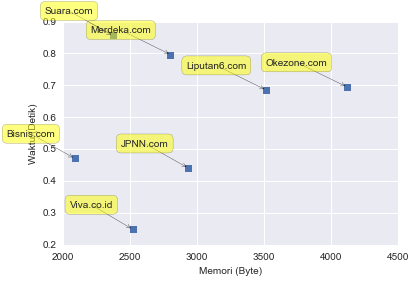

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8]
labels = ['Viva.co.id',  'Merdeka.com', 'Liputan6.com', 'Okezone.com', 'JPNN.com', 'Suara.com', 'Bisnis.com']
y1 = [DATACrawl[DATACrawl.sumber == i].crawlMem.mean() for i in x]
y2 = [DATACrawl[DATACrawl.sumber == i].crawlTime.mean() for i in x]

plt.plot(y1, y2,'s')
plt.xlabel('Memori (Byte)', fontsize=10)
plt.ylabel('Waktu (Detik)', fontsize=10)
for label, x, y in zip(labels, y1, y2):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    
plt.show()

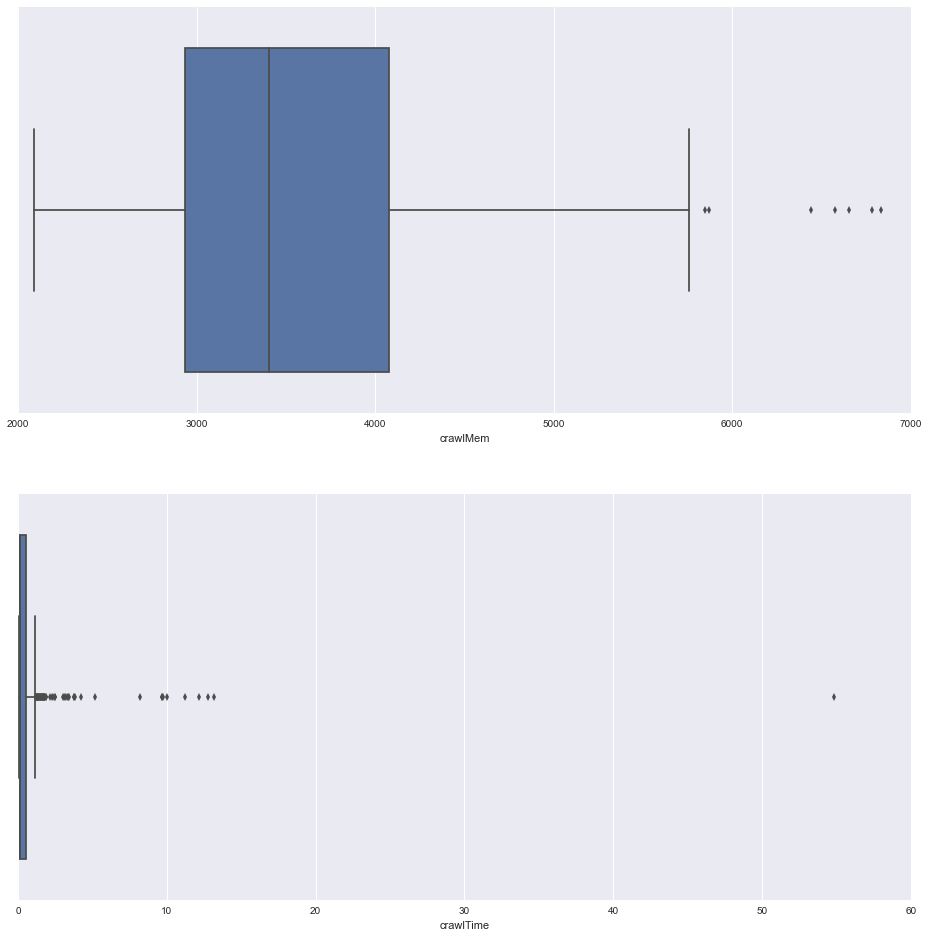

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2,figsize=(16,16))

sns.boxplot(crawlIndicator.crawlMem, orient = 'h',ax=ax[0])
sns.boxplot(crawlIndicator.crawlTime, orient = 'h', ax=ax[1])

plt.show()

#### Terlihat total penggunaan waktu dan memory sangat signifikan, hal tersebut karena jumlah berita positif dan negatif yang berbeda jauh

# 2.Evaluating the Classifier v1.4 vs v1.6 vs v2.0


## 2.1 Load from the 'Pickled' dump

In [6]:
DATAStd  = pd.DataFrame()
DATAPost = pd.DataFrame()

#Load standard striped Text
%time DATAStd['Judul'] = pickle.load( open( "v1.4\DATA_JUDULStriped-v3b.p", "rb" ) )
%time DATAStd['Short'] = pickle.load( open( "v1.4\DATA_SHORTStriped-v3b.p", "rb" ) )
%time DATAStd['Long']  = pickle.load( open( "v1.4\DATA_LONGStriped-v3b.p", "rb" ) )

#Load from PosTagged Noun and verb only Text
%time DATAPost['Judul'] = pickle.load( open( "v1.6\DATA_JUDULpostag-v4b.p", "rb" ) )
%time DATAPost['Short'] = pickle.load( open( "v1.6\DATA_SHORTpostag-v4b.p", "rb" ) )
%time DATAPost['Long']  = pickle.load( open( "v1.6\DATA_LONGpostag-v4b.p", "rb" ) )

#Load number of total tag in Text
%time AllFracJudul = pickle.load( open( "v2.0\DATA_JUDUL-v5b.p", "rb" ) )
%time AllFracShort = pickle.load( open( "v2.0\DATA_SHORT-v5b.p", "rb" ) )
%time AllFracLong  = pickle.load( open( "v2.0\DATA_LONG-v5b.p", "rb" ) )

#Load number of total noun-verb only in Text
# %time NVFracJudul = pickle.load( open( "v2.0\DATA_JUDUL-v2.p", "rb" ) )
# %time NVFracShort = pickle.load( open( "v2.0\DATA_SHORT-v2.p", "rb" ) )
# %time NVFracLong  = pickle.load( open( "v2.0\DATA_LONG-v2.p", "rb" ) )

%time DATA_TARGET = pickle.load( open( "v1.4\DATA_TARGET-v3b.p", "rb" ) )

DATA_TARGET = DATA_TARGET.reset_index(drop=True)
DATAStd  = DATAStd.reset_index(drop=True)
DATAPost = DATAPost.reset_index(drop=True)

Wall time: 6 ms
Wall time: 7 ms
Wall time: 59 ms
Wall time: 6 ms
Wall time: 5 ms
Wall time: 40 ms
Wall time: 26 ms
Wall time: 27 ms
Wall time: 25 ms
Wall time: 3 ms


In [7]:
#We only use 2% of total negative instance
factor = 100.0/100
size   = int(factor*DATA_TARGET[DATA_TARGET.values == -1].count())
print 'Total Negative Instances    : ',DATA_TARGET[DATA_TARGET.values == -1].count()
print 'Training Negative Instances : ',size
print 'Training Positif Instances  : ',DATA_TARGET[DATA_TARGET.values == 1].count()

Total Negative Instances    :  595
Training Negative Instances :  595
Training Positif Instances  :  104


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Stopwords data source : https://www.illc.uva.nl/Research/Publications/Reports/MoL-2003-02.text.pdf
stopword_html = open("id.stopwords.01.01.2016.txt",'r').read()
stopwords     = stopword_html.split("\n")

vect1 = TfidfVectorizer(decode_error='ignore')
vect2 = TfidfVectorizer(stop_words=stopwords,decode_error='ignore')

vectStds = vect1.fit_transform(DATAStd['Long'])
vectStop = vect2.fit_transform(DATAStd['Long'])
vectPost = vect1.fit_transform(DATAPost['Long'])

In [9]:
vectStds

<699x13687 sparse matrix of type '<type 'numpy.float64'>'
	with 110417 stored elements in Compressed Sparse Row format>

In [10]:
vectStop

<699x13134 sparse matrix of type '<type 'numpy.float64'>'
	with 74275 stored elements in Compressed Sparse Row format>

In [11]:
vectPost

<699x12075 sparse matrix of type '<type 'numpy.float64'>'
	with 76600 stored elements in Compressed Sparse Row format>

In [12]:
print AllFracLong.shape

(699L, 29L)


In [13]:
print (1871*28112)-331527
print (1871*27489)-229366
print (1871*25228)-233748

52266025
51202553
46967840


#### Data Teks berita yang sudah dibersihkan dari tag HTML di v1.4

In [14]:
print DATAStd.Judul.head(1).values

['laba anjlok, astra agro lestari tak bagi dividen']


#### Data Teks berita yang sudah di-POSTag verb dan noun di v1.6

In [15]:
print DATAPost.Judul.head(1).values

['laba anjlok astra agro lestari dividen']


#### Data Teks berita yang sudah diambil fraction verb dan noun di v2.0

In [16]:
AllFracJudul[:1]

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.]])

## 2. Evaluate

### Preprocessing

![smiley](img/evaluasi_preproc.png)

In [17]:
#Stopwords data source : https://www.illc.uva.nl/Research/Publications/Reports/MoL-2003-02.text.pdf
stopword_html = open("id.stopwords.01.01.2016.txt",'r').read()
stopwords     = stopword_html.split("\n")

In [18]:
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report, roc_auc_score,roc_curve,auc
from scipy import interp
import datetime

def skorStratCV(clf,X,y,nfolds=10):
    metrics = []
    
    trainTime,testTime = [],[]
    precis,recals,f1s,accs,rocs = [],[],[],[],[]
    
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []

    skf = cross_validation.StratifiedKFold(y, n_folds=nfolds)
    for train_index, test_index in skf:
        X_train,y_train = X[train_index],y[train_index]
        X_test,y_test   = X[test_index],y[test_index]
        
        #training time
        start = dt.now()
        clf.fit(X_train, y_train)
        end = dt.now()
        trainTime.append((end-start).microseconds)
        
        #testing time
        start = dt.now()
        yhat = clf.predict(X_test)
        end = dt.now()
        testTime.append((end-start).microseconds)
        
        #score
        precis.append(precision_score(y_test, yhat, average='binary'))
        recals.append(recall_score(y_test, yhat, average='binary'))
        f1s.append(f1_score(y_test, yhat, average='binary'))
        accs.append(accuracy_score(y_test, yhat))
        
        probas_              = clf.fit(X_train, y_train).predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        mean_tpr            += interp(mean_fpr, fpr, tpr)
        mean_tpr[0]          = 0.0
        
    def ave(lis):
        return sum(lis)/len(lis)
    
    metrics.append(ave(trainTime)+ave(testTime))
#     metrics.append(ave(testTime))
    metrics.append(ave(precis))
    metrics.append(ave(recals))
    metrics.append(ave(f1s))
    metrics.append(ave(accs))
    
    mean_tpr /= nfolds
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    metrics.append(mean_auc)
    
    return metrics,mean_fpr,mean_tpr

In [56]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

mnb = MultinomialNB(alpha=0.1)
#knn = KNeighborsClassifier()
svc = SVC(kernel='linear',cache_size=800,probability=True)
#tre = DecisionTreeClassifier(class_weight='balanced')

vectStds = TfidfVectorizer(decode_error='ignore')
#vectStop = TfidfVectorizer(stop_words=stopwords,decode_error='ignore')

kombinasi13 = [{'name' : 'MNB', 'pipe' : Pipeline([('vect', vectStds),('clf', mnb)])},
               #{'name' : 'KNN', 'pipe' : Pipeline([('vect', vect),('clf', knn)])},
               {'name' : 'SVM', 'pipe' : Pipeline([('vect', vectStds),('clf', svc)])},
               #{'name' : 'TREE', 'pipe' : Pipeline([('vect', vect),('clf', tre)])}
              ]

kombinasi24= [{'name' : 'MNB', 'pipe' : Pipeline([('vect', vectStds),('clf', mnb)])},
             #{'name' : 'KNN', 'pipe' : Pipeline([('vect', vect),('clf', knn)])},
             {'name' : 'SVM', 'pipe' : Pipeline([('vect', vectStds),('clf', svc)])},
             #{'name' : 'TREE', 'pipe' : Pipeline([('vect', vect),('clf', tre)])}
             ]

kombinasi5 = [{'name' : 'MNB', 'pipe' : mnb},
               {'name' : 'SVM', 'pipe' : svc},
             ]

In [20]:
kombinasi13[0]['pipe']

Pipeline(steps=[('vect', TfidfVectorizer(analyzer=u'word', binary=False, decode_error='ignore',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True))])

In [21]:
print len(AllFracJudul)
print len(AllFracShort)
print len(AllFracJudul+AllFracShort)

699
699
699


In [55]:
k = 'aku akan memakan semua makanan itu'

def stopwordRemoval(text):
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text

print stopwordRemoval(k)
JudulStop = DATAStd['Judul'].map(lambda x: stopwordRemoval(x))
ShortStop = DATAStd['Short'].map(lambda x: stopwordRemoval(x))
LongStop  = DATAStd['Long'].map(lambda x: stopwordRemoval(x))
FeedStop  = JudulStop+' '+ShortStop

JudulPostStop = DATAPost['Judul'].map(lambda x: stopwordRemoval(x))
ShortPostStop = DATAPost['Short'].map(lambda x: stopwordRemoval(x))
LongPostStop  = DATAPost['Long'].map(lambda x: stopwordRemoval(x))
FeedPostStop  = JudulPostStop+' '+ShortPostStop

print DATAStd['Judul'][198]
print JudulStop[198]

memakan makanan
mnc securities buka galeri investasi di universitas matana
mnc securities buka galeri investasi universitas matana


In [58]:
X0 = []
X0.append({'name':'Judul','Prep':'Kombinasi1','Data':DATAStd['Judul']})
X0.append({'name':'Short','Prep':'Kombinasi1','Data':DATAStd['Short']})
X0.append({'name':'Long' ,'Prep':'Kombinasi1','Data':DATAStd['Long']})
X0.append({'name':'Feed' ,'Prep':'Kombinasi1','Data':DATAStd['Judul']+' '+DATAStd['Short']})

X1 = []
X1.append({'name':'Judul','Prep':'Kombinasi2','Data':JudulStop})
X1.append({'name':'Short','Prep':'Kombinasi2','Data':ShortStop})
X1.append({'name':'Long' ,'Prep':'Kombinasi2','Data':LongStop})
X1.append({'name':'Feed' ,'Prep':'Kombinasi2','Data':FeedStop})

X2 = []
X2.append({'name':'Judul','Prep':'Kombinasi3','Data':DATAPost['Judul']})
X2.append({'name':'Short','Prep':'Kombinasi3','Data':DATAPost['Short']})
X2.append({'name':'Long' ,'Prep':'Kombinasi3','Data':DATAPost['Long']})
X2.append({'name':'Feed' ,'Prep':'Kombinasi3','Data':DATAPost['Judul']+' '+DATAPost['Short']})

X3 = []
X3.append({'name':'Judul','Prep':'Kombinasi4','Data':JudulPostStop})
X3.append({'name':'Short','Prep':'Kombinasi4','Data':ShortPostStop})
X3.append({'name':'Long' ,'Prep':'Kombinasi4','Data':LongPostStop})
X3.append({'name':'Feed' ,'Prep':'Kombinasi4','Data':FeedPostStop})

X4 = []
X4.append({'name':'Judul','Prep':'Kombinasi5','Data':AllFracJudul})
X4.append({'name':'Short','Prep':'Kombinasi5','Data':AllFracShort})
X4.append({'name':'Long' ,'Prep':'Kombinasi5','Data':AllFracLong})
X4.append({'name':'Feed' ,'Prep':'Kombinasi5','Data':AllFracJudul+AllFracShort})
# X2.append({'name':'Judul','Prep':'NVTag','Data':NVFracJudul})
# X2.append({'name':'Short','Prep':'NVTag','Data':NVFracShort})
# X2.append({'name':'Long' ,'Prep':'NVTag','Data':NVFracLong})

y_  = DATA_TARGET

## Kombinasi 1

In [59]:
for i in X0:
    k     = vect1.fit_transform(i['Data'])
    print k.get_shape()

(699, 1861)
(699, 2885)
(699, 13687)
(699, 3655)


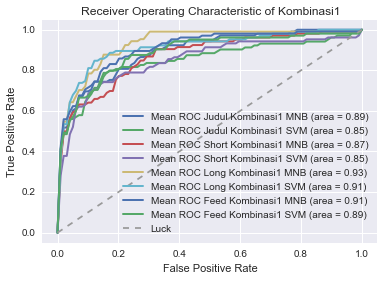

In [60]:
import matplotlib.pyplot as plt

metric = []
for xi in X0:
    X_ = xi['Data']
    for mod in kombinasi13:
        xP = X_[y_[y_.values == 1].index]
        xN = X_[y_[y_.values == -1].index][:size]
        X  = np.append(xP,xN)
        
        yP = y_[y_.values == 1]
        yN = y_[y_.values == -1][:size]
        y  = np.append(yP,yN)
        
        metrics,mean_fpr,mean_tpr = skorStratCV(mod['pipe'],X,y)
        name = xi['name']+' '+xi['Prep']+' '+mod['name']
        plt.plot(mean_fpr, mean_tpr,label='Mean ROC %s (area = %0.2f)' % (name,metrics[5]), lw=2)
        
        metric.append({'name':name,'metrics':metrics})

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Kombinasi1')
plt.legend(loc="lower right")
plt.show()

## Kombinasi 2

In [61]:
for i in X1:
    k     = vect2.fit_transform(i['Data'])
    print k.get_shape()

(699, 1690)
(699, 2576)
(699, 13134)
(699, 3318)


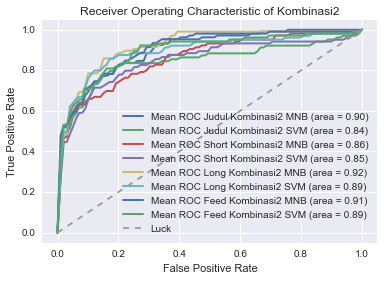

In [62]:
#metric = []
for xi in X1:
    X_ = xi['Data']
    for mod in kombinasi24:
        xP = X_[y_[y_.values == 1].index]
        xN = X_[y_[y_.values == -1].index][:size]
        X  = np.append(xP,xN)
        
        yP = y_[y_.values == 1]
        yN = y_[y_.values == -1][:size]
        y  = np.append(yP,yN)
        
        metrics,mean_fpr,mean_tpr = skorStratCV(mod['pipe'],X,y)
        name = xi['name']+' '+xi['Prep']+' '+mod['name']
        plt.plot(mean_fpr, mean_tpr,label='Mean ROC %s (area = %0.2f)' % (name,metrics[5]), lw=2)
        
        metric.append({'name':name,'metrics':metrics})

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Kombinasi2')
plt.legend(loc="lower right")
plt.show()

## Kombinasi 3

In [63]:
for i in X2:
    k     = vect1.fit_transform(i['Data'])
    print k.get_shape()

(699, 1596)
(699, 2495)
(699, 12075)
(699, 3192)


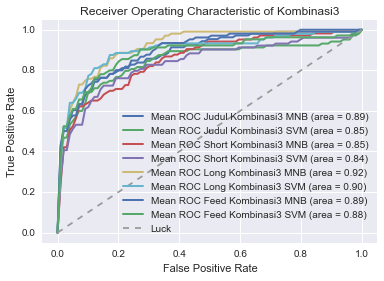

In [64]:
#metric = []
for xi in X2:
    X_ = xi['Data']
    for mod in kombinasi13:
        xP = X_[y_[y_.values == 1].index]
        xN = X_[y_[y_.values == -1].index][:size]
        X  = np.append(xP,xN)
        
        yP = y_[y_.values == 1]
        yN = y_[y_.values == -1][:size]
        y  = np.append(yP,yN)
        
        metrics,mean_fpr,mean_tpr = skorStratCV(mod['pipe'],X,y)
        name = xi['name']+' '+xi['Prep']+' '+mod['name']
        plt.plot(mean_fpr, mean_tpr,label='Mean ROC %s (area = %0.2f)' % (name,metrics[5]), lw=2)
        
        metric.append({'name':name,'metrics':metrics})

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Kombinasi3')
plt.legend(loc="lower right")
plt.show()

## Kombinasi 4

In [65]:
for i in X3:
    k     = vect2.fit_transform(i['Data'])
    print k.get_shape()

(699, 1526)
(699, 2345)
(699, 11712)
(699, 3017)


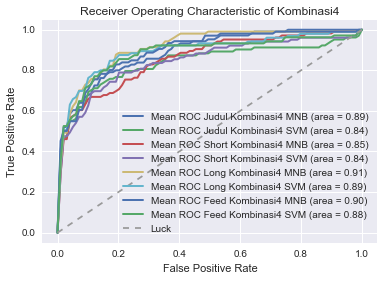

In [66]:
#metric = []
for xi in X3:
    X_ = xi['Data']
    for mod in kombinasi24:
        xP = X_[y_[y_.values == 1].index]
        xN = X_[y_[y_.values == -1].index][:size]
        X  = np.append(xP,xN)
        
        yP = y_[y_.values == 1]
        yN = y_[y_.values == -1][:size]
        y  = np.append(yP,yN)
        
        metrics,mean_fpr,mean_tpr = skorStratCV(mod['pipe'],X,y)
        name = xi['name']+' '+xi['Prep']+' '+mod['name']
        plt.plot(mean_fpr, mean_tpr,label='Mean ROC %s (area = %0.2f)' % (name,metrics[5]), lw=2)
        
        metric.append({'name':name,'metrics':metrics})

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Kombinasi4')
plt.legend(loc="lower right")
plt.show()

## Kombinasi 5

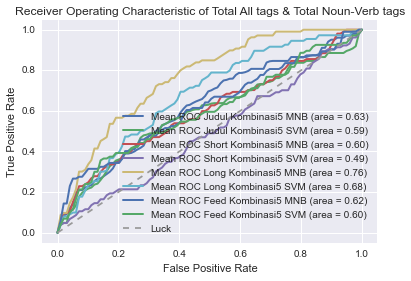

In [67]:
#metric = []
y2_  = pickle.load( open( "v2.0\DATA_TARGET-v5b.p", "rb" ) )
for xi in X4:
    X_ = xi['Data']
    for mod in kombinasi5:
        xP = X_[y2_[y2_.values == 1].index]
        xN = X_[y2_[y2_.values == -1].index][:size]
        X  = np.vstack((xP,xN))

        yP = y2_[y2_.values == 1]
        yN = y2_[y2_.values == -1][:size]
        y  = np.append(yP,yN)
        
        metrics,mean_fpr,mean_tpr = skorStratCV(mod['pipe'],X,y)
        name = xi['name']+' '+xi['Prep']+' '+mod['name']
        plt.plot(mean_fpr, mean_tpr,label='Mean ROC %s (area = %0.2f)' % (name,metrics[5]), lw=2)
        
        metric.append({'name':name,'metrics':metrics})

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Total All tags & Total Noun-Verb tags')
plt.legend(loc="lower right")
plt.show()

In [68]:
from ipy_table import *
metrics_table = []
tables = []
columns = (['id', 'nama','time','p_1',
            'r_1','F1 score','accuracy','AUC'])
tables.append(columns)

i = 0

for me in metric:
    i += 1
    
    metr = []
    metr.append(i)
    metr.append(me['name'])
    for m in me['metrics']:
        metr.append(m)

    tables.append(metr)
    metrics_table.append(metr)
    #print metric
    
make_table(tables)

# styling
apply_theme('basic_both')
set_column_style(7, align='center')

id,nama,time,p_1,r_1,F1 score,accuracy,AUC
1,Judul Kombinasi1 MNB,19200,0.6330,0.6109,0.5462,0.8415,0.8925
2,Judul Kombinasi1 SVM,203800,0.7305,0.4955,0.5349,0.8843,0.8478
3,Short Kombinasi1 MNB,50500,0.6593,0.4800,0.5146,0.8589,0.8705
4,Short Kombinasi1 SVM,291200,0.6986,0.4182,0.4809,0.8728,0.8467
5,Long Kombinasi1 MNB,282500,0.7928,0.5518,0.5760,0.8944,0.9307
6,Long Kombinasi1 SVM,388500,0.7360,0.5218,0.5427,0.8830,0.9127
7,Feed Kombinasi1 MNB,40700,0.6789,0.6518,0.6196,0.8747,0.9064
8,Feed Kombinasi1 SVM,326500,0.6721,0.4936,0.5081,0.8700,0.8866
9,Judul Kombinasi2 MNB,17300,0.6007,0.6409,0.5472,0.8272,0.8987
10,Judul Kombinasi2 SVM,145500,0.7329,0.5045,0.5358,0.8815,0.8438


In [69]:
evals = pd.DataFrame(metrics_table,columns=columns)
evals['Vars'] = [i.split()[0] for i in evals['nama']]
evals['Prep'] = [i.split()[1] for i in evals['nama']]
evals['Algs'] = [i.split()[2] for i in evals['nama']]
evals['Time'] = evals['time']
evals.drop('nama',axis=1,inplace=True)
evals.drop('id',axis=1,inplace=True)

In [72]:
evals.to_csv('Hasil.csv')

In [73]:
splitter1 = ['Judul','Short','Long']
splitter2 = ['Kombinasi1','Kombinasi2','Kombinasi3','Kombinasi4','Kombinasi5']
eval_teks = evals[evals.Prep.isin(splitter2)]
eval_teks = pd.DataFrame([eval_teks[eval_teks.Vars == i].mean() for i in splitter1]).transpose()
eval_teks.set_axis(1,splitter1)
eval_teks

,Judul,Short,Long
time,72730.000000,104410.000000,318930.000000
p_1,0.538070,0.526280,0.627242
r_1,0.460636,0.370273,0.482818
F1 score,0.439219,0.393195,0.478714
accuracy,0.854896,0.854313,0.870796
AUC,0.815885,0.789929,0.872266
Time,72730.000000,104410.000000,318930.000000


In [74]:
splitter = ['Kombinasi1','Kombinasi2','Kombinasi3','Kombinasi4','Kombinasi5']
eval_prep = pd.DataFrame([evals[evals.Prep == i].mean() for i in splitter]).transpose()
eval_prep.set_axis(1,splitter)
eval_prep

,Kombinasi1,Kombinasi2,Kombinasi3,Kombinasi4,Kombinasi5
time,200362.500000,177925.000000,174662.500000,134250.000000,84850.000000
p_1,0.700149,0.669173,0.669769,0.664737,0.110662
r_1,0.527955,0.542614,0.541250,0.549545,0.067500
F1 score,0.540373,0.533376,0.534432,0.534576,0.066724
accuracy,0.872452,0.861978,0.863047,0.861287,0.841820
AUC,0.886736,0.882129,0.877405,0.876224,0.620194
Time,200362.500000,177925.000000,174662.500000,134250.000000,84850.000000


In [75]:
splitter1 = ['MNB','SVM']
eval_teks = evals[evals.Algs.isin(splitter1)]
eval_teks = pd.DataFrame([eval_teks[eval_teks.Algs == i].mean() for i in splitter1]).transpose()
eval_teks.set_axis(1,splitter1)
eval_teks

,MNB,SVM
time,56315.000000,252505.000000
p_1,0.566340,0.559456
r_1,0.496045,0.395500
F1 score,0.469912,0.413881
accuracy,0.850915,0.869319
AUC,0.844964,0.812111
Time,56315.000000,252505.000000


In [76]:
mnb

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [77]:
#knn
# knn_params = {'n_neighbors': range(1,21), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree'],
#               'leaf_size': [15, 30, 50, 100], 'p': [1,2]}

In [78]:
svc
# lsvm_params = {'loss':['hinge', 'squared_hinge'],'class_weight':['balanced']}

SVC(C=1.0, cache_size=800, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [79]:
#tre
# tree_param = {"criterion": ["gini", "entropy"],"class_weight" : ['balanced']}